1. Clustering with the Iris Dataset

2. Using this lesson as a guide, perform clustering on the iris dataset.

3. Choose features other than the ones used in the lesson.
   Visualize the results of your clustering.
   Use the elbow method to visually select a good value for k.
   Repeat the clustering, this time with 3 different features.
4. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

5. How does scaling impact the results of clustering?

6. Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

## Data Prep

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
new_col_name=[]

for col in df.columns:
    new_col_name.append(col.lower().replace('.','_'))
df.columns = new_col_name

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Data Modeling:

In [4]:
X = df[['petal_width','sepal_width']]
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [5]:
df['clusters']=kmeans.predict(X)

X['clusters']=kmeans.predict(X)

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [7]:
X.head()

,petal_width,sepal_width,clusters
1,0.2,3.5,0
2,0.2,3.0,0
3,0.2,3.2,0
4,0.2,3.1,0
5,0.2,3.6,0


In [8]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,clusters
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.04
versicolor,5.936,2.770,4.260,1.326,1.92
virginica,6.588,2.974,5.552,2.026,1.12


In [9]:
# Amanda visualization function:
def viz_iris(iris):
    """
    This function will plot scatter chart for Actual species and those predicted by K - Means
    """
    
    # Get centroids' coordinates
    centroids = np.array(iris.groupby('clusters')['petal_length', 'sepal_length'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    # Add centroids' coordinates into new columns in local df
    iris['cen_x'] = iris.clusters.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    iris['cen_y'] = iris.clusters.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # Creates new column in local df to map distinct cluster colors
    colors = ['#81DF20' ,'#2095DF','#DF2020']
    iris['c'] = iris.clusters.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    # Plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = iris, x = 'petal_length', y = 'sepal_length', ax = ax1, hue = 'species', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(iris.petal_length, iris.sepal_length, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'petal_length', ylabel = 'sepal_length', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

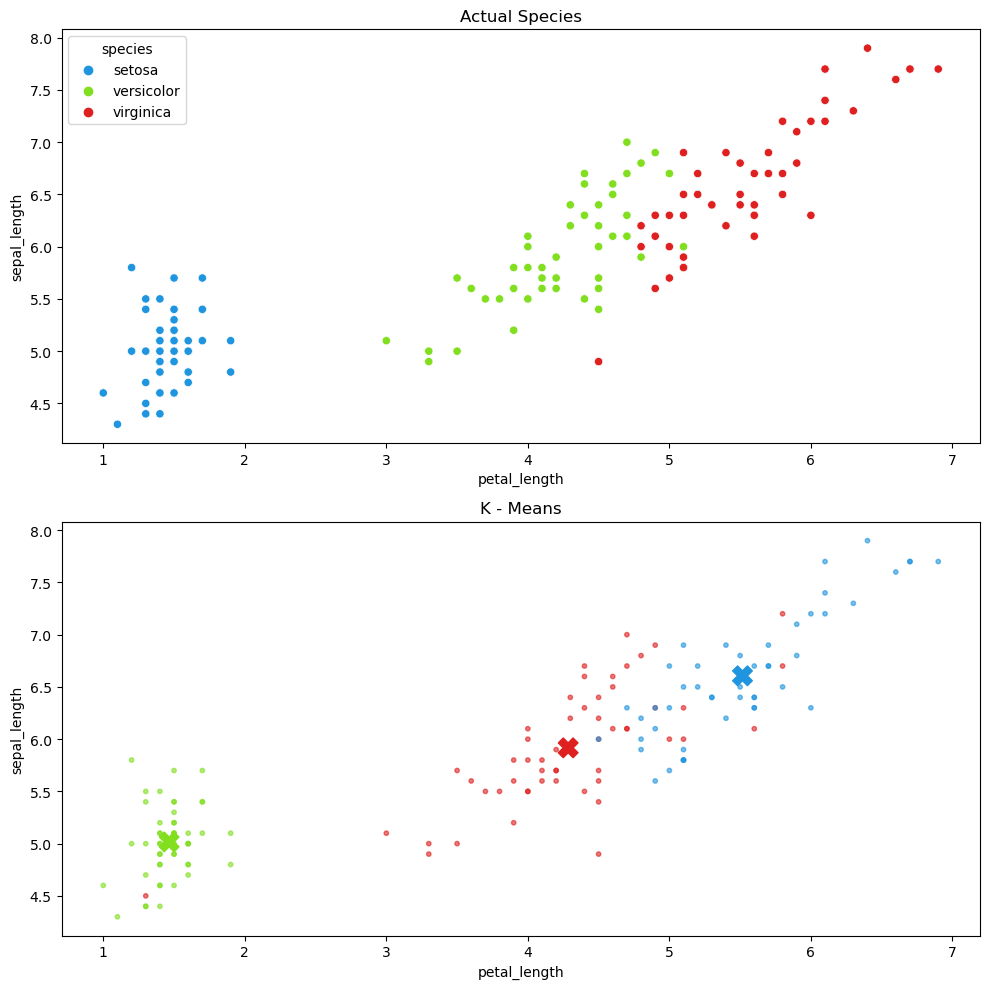

In [10]:
viz_iris(df)

In [11]:
#Calculate elbow method:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def elbow_method(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    # Plot the WCSS values
    plt.plot(range(1, max_k+1), wcss)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()


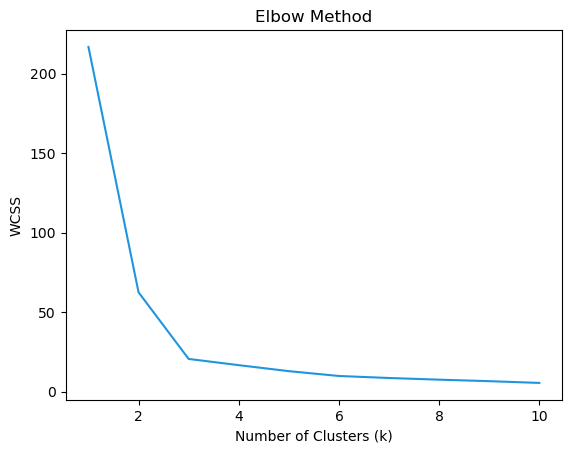

In [12]:
elbow_method(X,10)

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

### Unscaled Data

In [13]:
import wrangle as w
import env

In [14]:
df=w.get_data()
df.head()


,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,parcelid.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,14297519,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,17052889,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,14186244,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,781532,NaN,...,12095076,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [15]:
w.handle_missing_values(df,.95,.95)

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,max_transactiondate,id.1,parcelid.1,logerror,transactiondate,propertylandusedesc
0,261.0,14297519,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,...,2016.0,537569.0,11013.72,6.059063e+13,2017-01-01,0,14297519,0.025595,2017-01-01,Single Family Residential
1,261.0,17052889,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,...,2016.0,376000.0,5672.48,6.111001e+13,2017-01-01,1,17052889,0.055619,2017-01-01,Single Family Residential
2,261.0,14186244,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,...,2016.0,479489.0,6488.30,6.059022e+13,2017-01-01,2,14186244,0.005383,2017-01-01,Single Family Residential
3,261.0,12177905,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,...,2016.0,36225.0,1777.51,6.037300e+13,2017-01-01,3,12177905,-0.103410,2017-01-01,Single Family Residential
4,261.0,12095076,781532,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,...,2016.0,496619.0,9516.26,6.037461e+13,2017-01-01,6,12095076,-0.001011,2017-01-01,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,261.0,12412492,2274245,2.0,4.0,2.0,1633.0,1633.0,6037.0,2.0,...,2016.0,221068.0,4175.08,6.037555e+13,2017-09-19,77607,12412492,0.001082,2017-09-19,Single Family Residential
52315,261.0,11000655,673515,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,...,2016.0,283704.0,4478.43,6.037101e+13,2017-09-20,77609,11000655,0.020615,2017-09-20,Single Family Residential
52316,261.0,17239384,2968375,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,...,2016.0,16522.0,1107.48,6.111008e+13,2017-09-21,77610,17239384,0.013209,2017-09-21,Single Family Residential
52317,261.0,12773139,1843709,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,...,2016.0,16749.0,876.43,6.037434e+13,2017-09-21,77611,12773139,0.037129,2017-09-21,Single Family Residential


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52176 entries, 0 to 52318
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52176 non-null  float64
 1   parcelid                      52176 non-null  int64  
 2   id                            52176 non-null  int64  
 3   bathroomcnt                   52176 non-null  float64
 4   bedroomcnt                    52176 non-null  float64
 5   calculatedbathnbr             52140 non-null  float64
 6   calculatedfinishedsquarefeet  52175 non-null  float64
 7   finishedsquarefeet12          52031 non-null  float64
 8   fips                          52176 non-null  float64
 9   fullbathcnt                   52140 non-null  float64
 10  latitude                      52176 non-null  float64
 11  longitude                     52176 non-null  float64
 12  lotsizesquarefeet             51844 non-null  float64
 13  p

In [18]:
train,validate,test=w.split_data(df)

In [27]:
X=train[['bathroomcnt','bedroomcnt','latitude','longitude','logerror']]
X.isnull().sum()

bathroomcnt    0
bedroomcnt     0
latitude       0
longitude      0
logerror       0
dtype: int64

In [35]:
def calculate_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    
    # Create a new DataFrame with the cluster labels
    df = pd.DataFrame(data)
    df['cluster'] = kmeans.labels_
    
    return df

In [36]:
calculate_kmeans(X,5)

,bathroomcnt,bedroomcnt,latitude,longitude,logerror,cluster
11718,1.0,3.0,33910983.0,-118248547.0,-0.155558,1
20481,2.0,3.0,34105889.0,-117721194.0,-0.017992,1
49423,2.0,4.0,34208373.0,-118646719.0,0.138649,4
26764,2.0,3.0,34031485.0,-118369025.0,0.090732,4
31721,3.0,3.0,34576103.0,-118033094.0,-0.007501,2
...,...,...,...,...,...,...
15108,3.0,4.0,33926920.0,-117854220.0,-0.007349,1
11374,2.0,3.0,33763889.0,-117947994.0,-0.227475,1
32590,2.0,3.0,34191886.0,-118436563.0,-0.041610,4
4745,1.0,2.0,34194294.0,-118125510.0,-0.016939,1


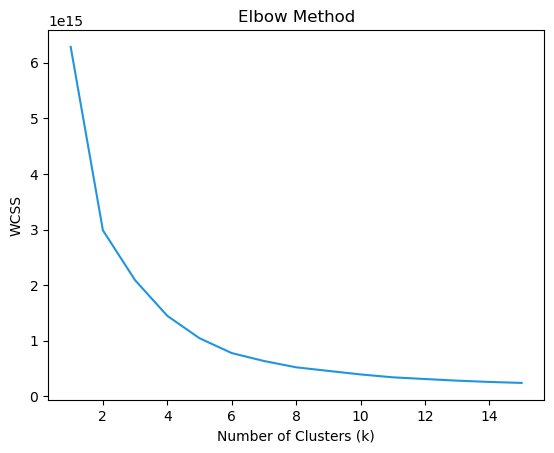

In [39]:
elbow_method(X,15)

In [42]:
from sklearn.preprocessing import RobustScaler
def robust_scale_data(X_train, X_validate):
    # Initialize RobustScaler object
    scaler = RobustScaler()
    
    # Fit scaler object to training data
    scaler.fit(X_train)
    
    # Transform training and validation data
    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    
    # Return scaled data
    return X_train_scaled, X_validate_scaled

In [43]:
X_train=train[['bathroomcnt','bedroomcnt','latitude','longitude','logerror']]
X_validate=validate[['bathroomcnt','bedroomcnt','latitude','longitude','logerror']]

### Scaled Data

In [45]:
x_train,x_validate=robust_scale_data(X_train,X_validate)

In [46]:
calculate_kmeans(x_train,5)

,0,1,2,3,4,cluster
0,-1.0,0.0,-0.314568,-0.200907,-2.495262,0
1,0.0,0.0,0.228230,0.922015,-0.387162,0
2,0.0,1.0,0.513639,-1.048756,2.013248,3
3,0.0,0.0,0.021021,-0.457447,1.278965,0
4,1.0,0.0,1.537737,0.257869,-0.226402,3
...,...,...,...,...,...,...
31300,1.0,1.0,-0.270184,0.638755,-0.224067,3
31301,0.0,0.0,-0.724212,0.439077,-3.597342,0
31302,0.0,0.0,0.467724,-0.601259,-0.749099,0
31303,-1.0,-1.0,0.474430,0.061083,-0.371029,0


In [47]:
calculate_kmeans(x_validate,5)

,0,1,2,3,4,cluster
0,-1.0,0.0,0.013365,-0.460111,8.432078,4
1,0.5,0.0,-1.498180,0.942397,-35.819605,0
2,-1.0,0.0,0.241177,-0.378491,1.625656,1
3,-1.0,-1.0,0.231215,-0.199721,-0.472040,1
4,1.0,0.0,-1.425783,0.963371,0.408621,3
...,...,...,...,...,...,...
10430,0.0,1.0,-0.037103,-0.528291,1.067541,3
10431,0.0,0.0,0.712059,-2.199674,-1.009173,1
10432,1.0,1.0,1.451224,0.241716,-1.218135,3
10433,-1.0,0.0,1.785609,-0.088411,-0.668606,1


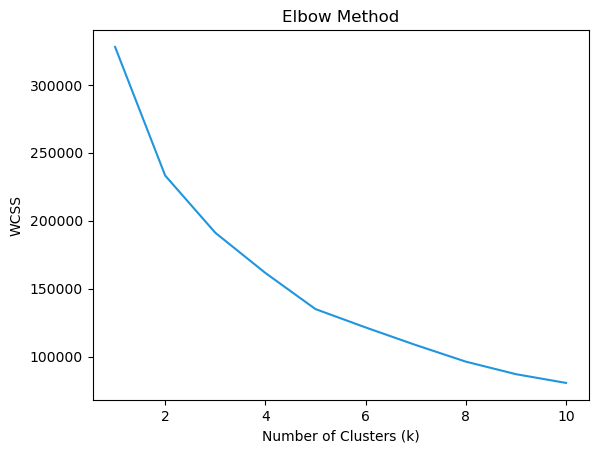

In [49]:
elbow_method(x_train,10)

In [53]:

# Call the visualize_clusters function
visualize_clusters(data, cluster_labels, actual_labels)

def visualize_clusters(data, cluster_labels, actual_labels):
    plt.scatter(data[:, 0], data[:, 1], c=actual_labels, cmap='viridis', label='Actual Labels')
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='Set1', marker='x', label='Cluster Labels')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering: Actual vs Predicted')
    plt.legend()
    plt.show()


TypeError: 'function' object is not subscriptable